# Cp6. Tools

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from common.gradient import *

def gradient_descent_history(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x, np.array(x_history)

## 1. Renew params

About Optimization

We've been learned **_SGD(Stochastic Gradient Descend)_**.

SGD is nice, simple approach, but also have weakness. 

### 2) SGD

$
\displaystyle W \leftarrow W - \eta \frac{\partial L}{\partial W}
$

In [4]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 3) Weakness of SGD

in<br/>
$
\displaystyle f(x,y) = \frac{1}{20} x^2 + y^2
$

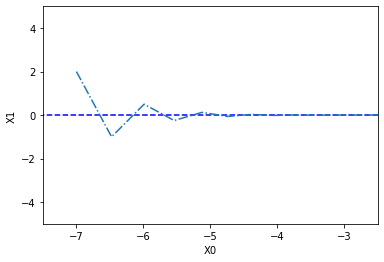

In [22]:
def fn_main(x):
    return (1/20)*(x[0]**2) + (x[1]**2)

x, x_history = gradient_descent_history(fn_main, np.array([-7., 2.]),lr=0.75,step_num=100)

plt.plot( [-10, 10], [0,0], '--b')
plt.plot( [0,0], [-10, 10], '--b')
plt.plot(x_history[:,0], x_history[:,1], '-o')

plt.xlim(-7.5, -2.5)
plt.ylim(-5, 5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 3) Momentum

$
\displaystyle \mathbf{v} \leftarrow \alpha\mathbf{v} - \eta\frac{\partial L}{\partial W}
$

$
\displaystyle \mathrm{W} \leftarrow \mathrm{W} + \mathrm{v}
$

In [5]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            for key in params.keys():
                self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
                params[key] += self.v[key]
